In [1]:
# Updates: 
# Put parse functions in a seperate file that will be and stay the main updated version
# Convert bin counts to concentrations (c/cm3) before plotting distributions.
# Plot CLASP params. 

In [1]:
import matplotlib
#matplotlib.use('Agg')
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from matplotlib import rcParams
import matplotlib.colors as colors
import os
import glob
from scipy import io

# Supress warnings for sake of log file
import warnings
warnings.filterwarnings("ignore")

# Plotting preferences

rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams.update({'font.size': 14}) 
rcParams['axes.titlepad'] = 14 
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
myFmt = md.DateFormatter('%H')
rule = md.HourLocator(interval=1)

d_loc='/Users/heather/ICECAPS-ACE/'
d1=dt.datetime(2019,9,11,0,0)
d2=dt.datetime(2019,9,12,0,0)
#d_loc = '/home/fluxtower/'
#calfile = '/home/fluxtower/CLASP-ICECAP-ACE/CLASP-cal-Feb2019/calibration-unit-F-Feb2019.mat' 
calfile = '/Users/heather/Desktop/Summit_May_2019/Instruments/CLASP/CLASP-cal-Feb2019/calibration-unit-F-Feb2019.mat' # Calibration .mat file

In [29]:
# For each dataset, get array of counts/cm3. And a seperate array of params.
cpc_counts = get_cpc(d_loc,d1,d2)
skyopc_counts,skyopc_params = get_skyopc(d_loc,d1,d2)
MSF_counts,MSF_params = get_opc('MSF',d_loc,d1,d2)
clasp_counts,clasp_params = get_clasp(d_loc,d1,d2,'CLASP_F',16,calfile,1)

In [30]:
# Calculate total c/cm3 for each dataset - just the sum of c/cm3 in individual bins
MSF_total = MSF_counts.sum(axis=1)
clasp_total = clasp_counts.sum(axis=1)
skyopc_total = skyopc_counts.sum(axis=1)

In [35]:
# For plots, resample everything to 10s by median?.
# Counts per 5 s
MSF_total_10 = MSF_total.resample('10s').median()
MSF_counts_10 = MSF_counts.resample('10s').median()

clasp_total_10 = clasp_total.resample('10s').median()
clasp_counts_10 = clasp_counts.resample('10s').median()

skyopc_total_10 = skyopc_total.resample('10s').median()
skyopc_counts_10 = skyopc_counts.resample('10s').median()

cpc_total_10 = cpc_counts.resample('10s').median()


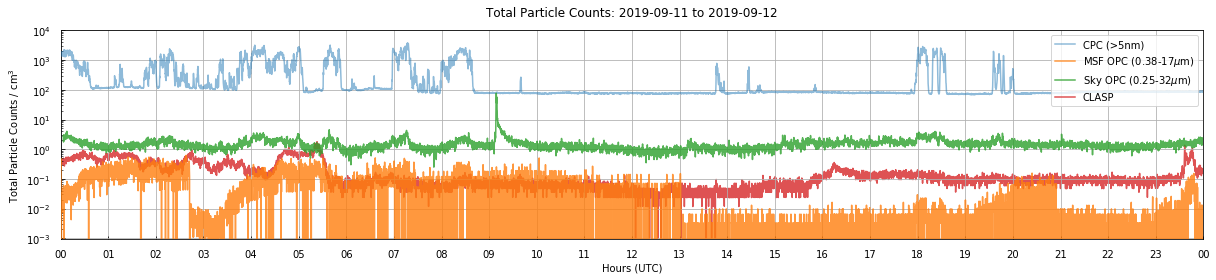

In [36]:
# Plot totals
fig = plt.figure(figsize=(17,4))
ax = fig.add_subplot(111)
ax.grid(True)

ax.semilogy(cpc_total_10.index,cpc_total_10, label='CPC (>5nm)',zorder=3,alpha=0.5)
ax.semilogy(MSF_total_10.index,MSF_total_10,label = 'MSF OPC (0.38-17$\mu$m)',zorder=4,alpha=0.8)  
#ax.semilogy(TAWO_OPC_1min.index,TAWO_OPC_1min,label = 'TAWO OPC (0.38-17$\mu$m)',zorder=2,alpha=0.8)
ax.semilogy(skyopc_total_10.index,skyopc_total_10,label = 'Sky OPC (0.25-32$\mu$m)',zorder=3,alpha=0.8)
ax.semilogy(clasp_total_10.index,clasp_total_10,label = 'CLASP',zorder=1,alpha=0.8)
    
ax.set_ylim(0,10000)
ax.set_ylabel('Total Particle Counts / cm$^3$')
ax.set_title('Total Particle Counts: %s'%((dt.datetime.strftime(d1,'%Y-%m-%d')+' to '+dt.datetime.strftime(d2,'%Y-%m-%d'))))
ax.set_xlabel('Hours (UTC)')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(rule)
ax.set_xlim(d1,d2)
ax.legend(loc='best',fontsize=10)
fig.tight_layout()

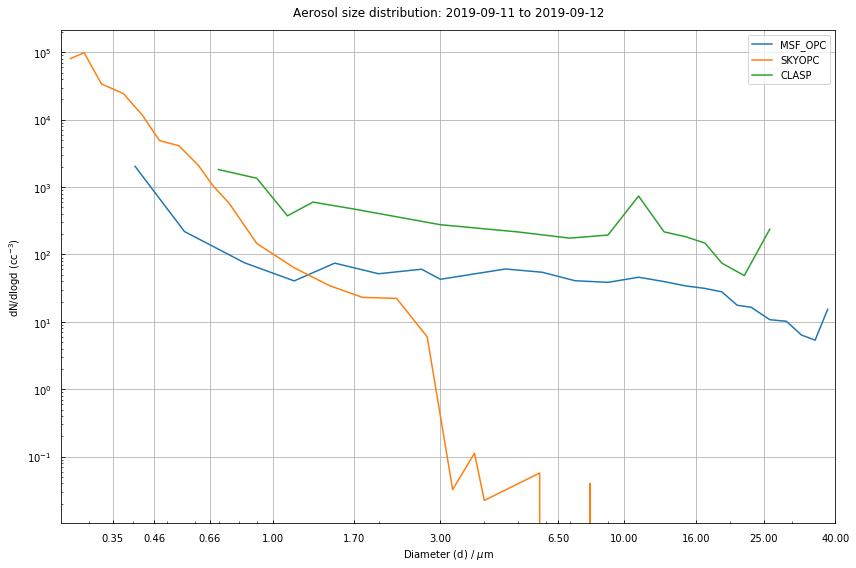

In [42]:
# Plot distribution

OPC_bins = 24
OPC_bounds = [0.35, 0.46, 0.66, 1, 1.3, 1.7, 2.3, 3, 4, 5.2, 6.5, 8, 10, 12, 14, 16, 18, 20, 22, 25, 28, 31, 34, 37, 40]
SKYOPC_bins = 31
SKYOPC_bounds = [0.25,0.28,0.3,0.35,0.4,0.45,0.5,0.58,0.65,0.7,0.8,1.0,1.3,1.6,2,2.5,3,3.5,4,5,6.5,7.5,8.5,10,12.5,15,17.5,20,25,30,32,40]
CLASP_bins=16
CLASP_bounds=[0.6,0.8,1,1.2,1.4,2,4,6,8,10,12,14,16,18,20,24,28]

MSF_dist = get_dist(MSF_counts_10,OPC_bins,OPC_bounds)
SKYOPC_dist= get_dist(skyopc_counts_10,SKYOPC_bins,SKYOPC_bounds)
CLASP_dist= get_dist(clasp_counts_10,CLASP_bins,CLASP_bounds)

plot_dist([MSF_dist,SKYOPC_dist,CLASP_dist],['MSF_OPC','SKYOPC','CLASP'],[SKYOPC_bounds[0],SKYOPC_bounds[-1]])


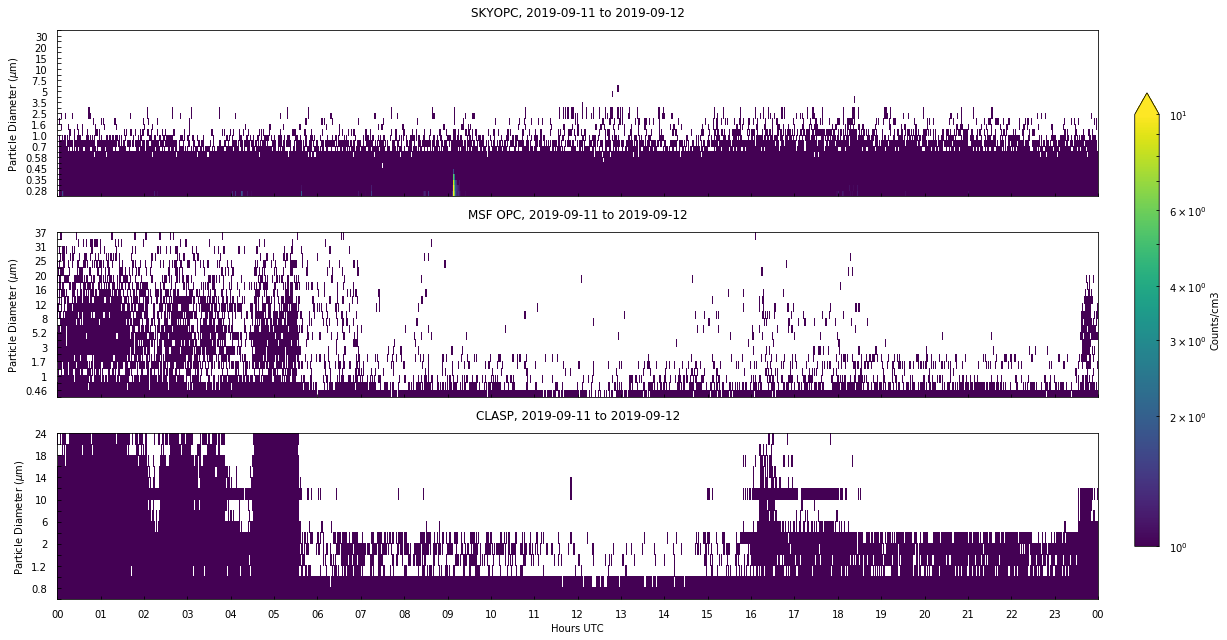

In [88]:
# Plot time series spectra
skyopc_counts_np = skyopc_counts_10.to_numpy()
skyopc_dates = np.array(skyopc_counts_10.index.to_pydatetime())

msf_counts_np = MSF_counts_10.to_numpy()
msf_dates = np.array(MSF_counts_10.index.to_pydatetime())

clasp_counts_np = clasp_counts_10.to_numpy()
clasp_dates = np.array(clasp_counts_10.index.to_pydatetime())
 
in_x = [skyopc_dates,msf_dates,clasp_dates]
in_y = [skyopc_counts_np,msf_counts_np,clasp_counts_np]
in_bounds = [SKYOPC_bounds,OPC_bounds,CLASP_bounds]
in_names = ['SKYOPC','MSF OPC','CLASP']

#if len(in_list[0])!=len(in_list[1]):
#    print('Input lists are not the same length')

nrow = len(in_x)
fig, axs = plt.subplots(nrows=nrow, ncols=1,squeeze=0,sharex=True,figsize=(17,3*nrow))
for i in range(0,nrow):
    x = in_x[i]
    y = in_y[i]
    bins=in_bounds[i]
    name = in_names[i]
    cs = axs[i][0].pcolormesh(x,np.arange(0,len(bins)-1,1),np.transpose(y),norm=colors.LogNorm(vmin=1, vmax=10),cmap='viridis')

    #else:
    #    cb = plt.colorbar(cs,extend='max',label='Counts')
    #    cb.remove()
    
    axs[i][0].xaxis_date()
    axs[i][0].set_title('%s, %s to %s'%(name,dt.datetime.strftime(d1,'%Y-%m-%d'),dt.datetime.strftime(d2,'%Y-%m-%d')))
    axs[i][0].set_yticks(np.arange(0,len(bins)-1,1))
    axs[i][0].tick_params(axis='y', which='major', labelsize=10) 
    for label in axs[i][0].yaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    axs[i][0].set_yticklabels(bins)
    axs[i][0].set_ylabel('Particle Diameter ($\mu$m)')
    if i==nrow-1:
        axs[i][0].set_xlabel('Hours UTC')
    axs[i][0].set_xlim(d1,d2)
    axs[i][0].xaxis.set_major_formatter(myFmt)
    axs[i][0].xaxis.set_major_locator(rule)   


fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
fig.colorbar(cs,cax=cbar_ax,extend='max',label='Counts/cm3')



#fig.savefig(d_loc + '%s_timeseries_current.png'%name)
#fig.clf()


In [21]:
# Functions - to put in a seperate file: 

# Get CPC data
def get_cpc(d_loc,d1,d2):
    os.chdir(d_loc+'Data/')                  # Change directory to where the data is
    #log = open(log_licor,'w')             # Open the log file for writing
    all_files = glob.glob('*CPC*')
    file_dates = np.asarray([(dt.datetime.strptime(f[-14:-4], '%Y-%m-%d')).date() for f in all_files]) 
    idxs = np.where(np.logical_and(file_dates>=d1.date(), file_dates<=d2.date()))[0]
    dfs = [all_files[i] for i in idxs]
    cpc = pd.DataFrame()
    for f in dfs: 
        # Ignore file if it's empty
        if os.path.getsize(f)==0:
            #log.write('Error with: '+f+' this file is empty.\n')
            continue 
        cpc = cpc.append(pd.read_csv(f,sep=',',error_bad_lines=False,header=None,parse_dates={'Dates' : [0,1,2,3,4,5]}))  

    cpc.Dates = pd.to_datetime(cpc.Dates,format='%Y %m %d %H %M %S')
    cpc = cpc.sort_values('Dates')
    cpc = cpc.set_index(cpc['Dates'])
    cpc.index = pd.DatetimeIndex(cpc.index)
    del cpc['Dates']
    cpc_counts =cpc.rename(columns={6:'Concentration (/cm3)'})
    return cpc_counts



## Get OPC data
    
def get_opc(opc_n,d_loc,d1,d2):
    os.chdir(d_loc+'Data/')                  # Change directory to where the data is
    #log = open(log_licor,'w')             # Open the log file for writing
    all_files = glob.glob('*%s*OPC*'%opc_n)
    if opc_n=='TAWO':
        file_dates = np.asarray([(dt.datetime.strptime(f[-12:-4], '%Y%m%d')).date() for f in all_files])
    else:
        file_dates = np.asarray([(dt.datetime.strptime(f[-14:-4], '%Y-%m-%d')).date() for f in all_files])
           
    idxs = np.where(np.logical_and(file_dates>=d1.date(), file_dates<=d2.date()))[0]
    dfs = [all_files[i] for i in idxs]
    opc = pd.DataFrame()
    # Extract the data
    for f in dfs: 
        # Ignore file if it's empty
        if os.path.getsize(f)==0:
            #log.write('Error with: '+f+' this file is empty.\n')
            continue 
        opc = opc.append(pd.read_csv(f, skiprows=4,sep=',',error_bad_lines=False))  
    opc['Dates'] = pd.to_datetime(opc['time'],format='%Y-%m-%d %H:%M:%S')
    opc = opc.sort_values('Dates')
    opc = opc.set_index(opc['Dates'])
    opc.index = pd.DatetimeIndex(opc.index)
    #opc = opc[~opc.index.duplicated()]
    del opc['time'], opc['Dates']

    # Convert flow rate from L/min to cm3/s
    # 1 L/min = 16.66667 cm3/s
    opc.FlowRate = opc.FlowRate/100 * 16.66667

    # Get total counts
    #opc['total_counts']=opc['b0'].astype(float)+ opc['b1'].astype(float)+ opc['b2'].astype(float)+ opc['b3'].astype(float)+ opc['b4'].astype(float)+ opc['b5'].astype(float)+ opc['b6'].astype(float)+ opc['b7'].astype(float)+ opc['b8'].astype(float)+ opc['b9'].astype(float)+ opc['b10'].astype(float)+ opc['b11'].astype(float)+ opc['b12'].astype(float)+ opc['b13'].astype(float)+ opc['b14'].astype(float)+ opc['b15'].astype(float)+ opc['b16'].astype(float)+ opc['b17'].astype(float)+ opc['b18'].astype(float)+ opc['b19'].astype(float)+ opc['b20'].astype(float)+ opc['b21'].astype(float)+ opc['b22'].astype(float)+ opc['b23'].astype(float)
    #opc['total_counts']=opc['total_counts'].replace({0: np.nan})
    
    opc_counts = opc[opc.columns[0:24]]
    opc_counts = opc_counts.apply(pd.to_numeric, errors='coerce')
    opc_params = opc[opc.columns[24:]]
    
    # Convert counts/interval to total counts/s
    opc.period = opc.period/100.0 # period in s
    opc_counts = opc_counts.divide(opc.period, axis=0)
    # Convert total counts/second to counts/cm3
    opc_counts = opc_counts.divide(opc.FlowRate, axis=0)

    return opc_counts, opc_params



# Function to read SKYOPC data
# Get SKYOPC Data
# Measurement interval 6 seconds
# I think C0 = time
# C1 = time + 6 s
# C2 = time + 12 s
# ect.
# 32 channels 
# data output in the unit particle/100ml
# SKYOPC chaneel boundaries:
#0.25,0.28,0.3,0.35,0.4,0.45,0.5,0.58,0.65,0.7,0.8,1.0,1.3,1.6,2,2.5,3,3.5,4,5,6.5,7.5,8.5,10,12.5,15,17.5,20,25,30,32 
#channels 16 and 17 are identical (overlapping 
#channel for different physical measurement ranges)...so one should be 
#discarded before analysis.

# Function to read and import GRIMM OPC data
def get_skyopc(d_loc,d1,d2):
    os.chdir(d_loc+'Data/')                  # Change directory to where the data is
    #log = open(log_licor,'w')             # Open the log file for writing
    all_files = glob.glob('*SKYOPC*')
    file_dates = np.asarray([(dt.datetime.strptime(f[-14:-4], '%Y-%m-%d')).date() for f in all_files])
    idxs = np.where(np.logical_and(file_dates>=d1.date(), file_dates<=d2.date()))[0]
    dfs = [all_files[i] for i in idxs]
    skyopc = pd.DataFrame()
    c=np.nan
    # Extract the data
    for f in dfs: 
        # Ignore file if it's empty
        if os.path.getsize(f)==0:
            #log.write('Error with: '+f+' this file is empty.\n')
            continue 
        f_data = open(f)
        d = f_data.readlines()
        f_data.close()
        for i in range(0,len(d)):
            line=d[i].split()
            if line[0] =='P':
                if len(line)!=17:
                    c=0
                    datetime=np.nan
                    continue
                #Year Mon Day Hr Min Loc 4Tmp Err pA/p pR/p UeL Ue4 Ue3 Ue2 Ue1 Iv 
                datetime = dt.datetime(int(line[1])+2000,int(line[2]),int(line[3]),int(line[4]),int(line[5]))
                #datetime = dt.datetime.strptime('20'+line[1]+line[2]+line[3]+line[4]+line[5],'%Y%m%d%H%M')
                quad_Tmp = int(line[7])
                Err = int(line[8])
                pAp = int(line[9])
                pRp = int(line[10])
                Int = int(line[16])
                c=0
            
            elif len(line)!=9:
                continue

            elif c==0: 
                ch1=int(line[1])
                ch2=int(line[2])
                ch3=int(line[3])
                ch4=int(line[4])
                ch5=int(line[5])
                ch6=int(line[6])
                ch7=int(line[7])
                ch8=int(line[8])
                c = c+1    
            elif c ==1:
                ch9=int(line[1])
                ch10=int(line[2])
                ch11=int(line[3])
                ch12=int(line[4])
                ch13=int(line[5])
                ch14=int(line[6])
                ch15=int(line[7])
                ch16=int(line[8])
                c = c+1
            elif c == 2:
                ch17=int(line[1])
                ch18=int(line[2])
                ch19=int(line[3])
                ch20=int(line[4])
                ch21=int(line[5])
                ch22=int(line[6])
                ch23=int(line[7])
                ch24 =int(line[8])
                c= c+1
            elif c==3:
                ch25=int(line[1])
                ch26=int(line[2])
                ch27=int(line[3])
                ch28=int(line[4])
                ch29=int(line[5])
                ch30=int(line[6])
                ch31=int(line[7])
                ch32=int(line[8])
                c = 0
                n = int(line[0][-2])
                if isinstance(datetime,dt.datetime):
                    skyopc = skyopc.append(pd.Series([datetime+dt.timedelta(seconds=n*6), ch1, ch2, ch3, ch4, ch5, ch6, ch7, ch8, ch9, ch10, ch11, ch12, ch13, ch14, ch15, ch16, ch17, ch18, ch19, ch20, ch21, ch22, ch23, ch24, ch25, ch26, ch27, ch28, ch29, ch30, ch31, ch32, quad_Tmp,Err,pAp,pRp,Int]),ignore_index=True)
            
    # remove repeated channel 16
    del skyopc[16]
    # Correct counts for size bins 'all counts above lower threshold.'        
    for i in range(2,16):
        skyopc[i-1]=skyopc[i-1]-skyopc[i]
    for i in range(18,33):
        skyopc[i-1]=skyopc[i-1]-skyopc[i]
    
    skyopc=skyopc.rename(columns={0: 'Date',1:'ch1' ,2: 'ch2', 3: 'ch3',4: 'ch4',5: 'ch5',6: 'ch6',7: 'ch7',8: 'ch8',9: 'ch9',10: 'ch10',11: 'ch11',12: 'ch12',13: 'ch13',14: 'ch14',15: 'ch15',16: 'ch16',17: 'ch17',18: 'ch18',19: 'ch19', 20:'ch20',21: 'ch21',22: 'ch22',23: 'ch23',24: 'ch24',25: 'ch25',26: 'ch26',27: 'ch27',28: 'ch28',29: 'ch29',30: 'ch30',31: 'ch31',32: 'ch32',33: 'quad_Tmp',34:'Err',35:'pAp',36:'pRp',37:'Int'})
    skyopc.dropna(inplace=True)
    skyopc = skyopc.set_index('Date')
    skyopc = skyopc.sort_values('Date')
    skyopc.index = pd.DatetimeIndex(skyopc.index)
    skyopc = skyopc[~skyopc.index.duplicated()]
    
    skyopc_counts = skyopc[skyopc.columns[0:31]]
    skyopc_counts = skyopc_counts.apply(pd.to_numeric, errors='coerce') # Counts in counts/ 6 seconds
    skyopc_counts =skyopc_counts / 100.0 # convert from counts/100ml to counts/cm3    
    skyopc_params = skyopc[skyopc.columns[31:]]
    
    return skyopc_counts, skyopc_params





# Function to read and process CLASP data
# Inputs

def get_clasp(d_loc,d1,d2,claspn,channels,calfile,sf):
    # Function to convery interger to binary.
    get_bin = lambda x, n: format(x, 'b').zfill(n)
    os.chdir(d_loc+'Data/')                  # Change directory to where the data is
    #log = open(log_licor,'w')             # Open the log file for writing
    all_files = glob.glob('*%s*'%claspn)
    file_dates = np.asarray([(dt.datetime.strptime(f[-14:-4], '%Y-%m-%d')).date() for f in all_files])
    idxs = np.where(np.logical_and(file_dates>=d1.date(), file_dates<=d2.date()))[0]
    dfs = [all_files[i] for i in idxs]
    data_block=[]
    for f in dfs: 
        # Read in the data
        fid = open(f)
        data_block.append(list(filter(('\n').__ne__, fid.readlines())))
        fid.close()
        
    data_block=list(np.concatenate(data_block))
     
    # Initialise empty dataframes
    dates = []
    CLASP = np.ones([np.shape(data_block)[0],16])*-999  # Counts
    statusaddr = np.ones(np.shape(data_block)[0])*-999  # Status address
    parameter = np.ones(np.shape(data_block)[0])*-999   # Parameter value
    overflow = np.ones(np.shape(data_block)[0])*-999    # Overflow (channel 1-8 only)
    #flow_check = np.ones(len(data_block))*-999  # True if flow is in range - this is too stringent, can ignore
    heater = np.ones(np.shape(data_block)[0])*-999      # True if heater is on
    #sync = np.ones(len(data_block))*-999       # CAN IGNORE THIS - it's not connected

    # Loop through, extract and sort data into the dataframes initialised above
    for i in range(0,np.shape(data_block)[0]):
        split = data_block[i].split()
        # Extract and store dates
        date = dt.datetime(int(split[0]),int(split[1]),int(split[2]),
                           int(split[3]),int(split[4]),
                           int(np.floor(float(split[5])))) 
        dates.append(date)   

        if len(split)!=25:
            continue
    
        # Extract and store counts
        for x in range(0,16):
            CLASP[i,x] = float(split[-16:][x])    
    
        # Extract, and convert staus addresses, store flags
        statusbyte=float(split[6])
        binary=get_bin(int(statusbyte),8)
        statusaddr[i] = int(binary[4:8],2)
        heater[i] = int(binary[2])       # check you have these the right way around
         
        # Extract and store status parameters and overflow flag
        parameter[i]=float(split[7])
        overflow[i]=float(split[8])  
      
        # Check overflow flags and correct histogram. 
        # Overflow is for channels 1 to 8 only.
        for n in range(0,8):
            obin=get_bin(int(overflow[i]),8)
            if int(obin[::-1][0]):
                #print('overfow recorded')
                CLASP[i,n] = CLASP[i,n] + 256
                
        # Arrange parameters into a neat dataframe
    param_len = int(len(statusaddr)/10)
    
    rejects = parameter[np.where(statusaddr==0)[0][0:param_len]]
    threshold = parameter[np.where(statusaddr==1)[0][0:param_len]]
    ThisFlow = parameter[np.where(statusaddr==2)[0][0:param_len]]
    FlowPWM = parameter[np.where(statusaddr==3)[0][0:param_len]]
    PumpCurrent = parameter[np.where(statusaddr==4)[0][0:param_len]]
    SensorT = parameter[np.where(statusaddr==5)[0][0:param_len]]
    HousingT = parameter[np.where(statusaddr==6)[0][0:param_len]]
    PumpT = parameter[np.where(statusaddr==7)[0][0:param_len]]
    SupplyV = parameter[np.where(statusaddr==8)[0][0:param_len]]
    LaserR  = parameter[np.where(statusaddr==9)[0][0:param_len]]
    param_dates = np.asarray(dates)[np.where(statusaddr==0)[0][0:param_len]]
   
    if len(param_dates)<param_len:
        param_len = len(param_dates)
    if len(rejects)<param_len:
        param_len = len(rejects)
    if len(threshold)<param_len:
        param_len = len(threshold)
    if len(ThisFlow)<param_len:
        param_len = len(ThisFlow)
    if len(FlowPWM)<param_len:
        param_len = len(FlowPWM)
    if len(PumpCurrent)<param_len:
        param_len = len(PumpCurrent)
    if len(SensorT)<param_len:
        param_len = len(SensorT)
    if len(HousingT)<param_len:
        param_len = len(HousingT)
    if len(PumpT)<param_len:
        param_len = len(PumpT)
    if len(SupplyV)<param_len:
        param_len = len(SupplyV)
    if len(LaserR)<param_len:
        param_len = len(LaserR)

    param_dates = np.asarray(dates)[np.where(statusaddr==0)[0][0:param_len]] 
    rejects = parameter[np.where(statusaddr==0)[0][0:param_len]]
    threshold = parameter[np.where(statusaddr==1)[0][0:param_len]]
    ThisFlow = parameter[np.where(statusaddr==2)[0][0:param_len]]
    FlowPWM = parameter[np.where(statusaddr==3)[0][0:param_len]]
    PumpCurrent = parameter[np.where(statusaddr==4)[0][0:param_len]]
    SensorT = parameter[np.where(statusaddr==5)[0][0:param_len]]
    HousingT = parameter[np.where(statusaddr==6)[0][0:param_len]]
    PumpT = parameter[np.where(statusaddr==7)[0][0:param_len]]
    SupplyV = parameter[np.where(statusaddr==8)[0][0:param_len]]
    LaserR  = parameter[np.where(statusaddr==9)[0][0:param_len]]

    param_df=pd.DataFrame({'Date':param_dates,'Rejects (n)':rejects,'Threshold (mV)':threshold,
                        'ThisFlow':ThisFlow,'FlowPWM':FlowPWM,'PumpCurrent (mA)':PumpCurrent,
                        'SensorT (C)':SensorT,'HousingT (C)':HousingT,'PumpT (C)':PumpT,
                        'SupplyV':SupplyV,'LaserR':LaserR})

    param_df = param_df.set_index('Date')
    param_df.index = pd.DatetimeIndex(param_df.index)
    param_df = param_df[~param_df.index.duplicated()]

    # Arrange Counts into a neat dataframe
    CLASP_df = pd.DataFrame({'Date':dates,
                        1:CLASP[:,0],2:CLASP[:,1],
                        3:CLASP[:,2],4:CLASP[:,3], 5:CLASP[:,4],
                        6:CLASP[:,5],7:CLASP[:,6],8:CLASP[:,7],9:CLASP[:,8],
                        10:CLASP[:,9],11:CLASP[:,10],12:CLASP[:,11], 
                        13:CLASP[:,12],14:CLASP[:,13],15:CLASP[:,14],16:CLASP[:,15]})
    CLASP_df = CLASP_df.set_index('Date')
    CLASP_df.index = pd.DatetimeIndex(CLASP_df.index)
    CLASP_df = CLASP_df[~CLASP_df.index.duplicated()]
    CLASP_df = pd.concat([CLASP_df, param_df], axis=1)

    # Apply flow corrections and quality flags, 
    # convert raw counts to concentrations in particles per ml.
    # Get calibration data
    cal_dict=io.loadmat(calfile,matlab_compatible=True)
    TSIflow = cal_dict['calibr'][0][0][8][0]         # array of calibration flow rates from TSI flow meter
    realflow = cal_dict['calibr'][0][0][9][0]        # array of measured A2D flow rates matching TSflow

    # Do flow correction and convert to concentations
    # TSI flow is from the TSI flowmeter, realflow is the flow the CLASP records internally
    P = np.polyfit(realflow,TSIflow,2) # These are from the flow calibration - fit a polynomial
    flow = np.polyval(P,CLASP_df['ThisFlow']) # flow in L/min
    flow_correction = ((flow/60)*1000)/sf # Sample volume in cm3/s

    # Interpolate flow correction onto full timeseries and add to array
    def nan_helper(y):
        return np.isnan(y), lambda z: z.nonzero()[0]
    nans, x= nan_helper(flow_correction)
    flow_correction[nans]= np.interp(x(nans), x(~nans), flow_correction[~nans])
    CLASP_df['Sample volume (ml/s)']=flow_correction
    

    # Now to plot concentrations in counts/cm3, just need to divide the counts/s by the sample volume
    clasp_counts = CLASP_df[CLASP_df.columns[0:16]]
    clasp_params = CLASP_df[CLASP_df.columns[16:]]
    clasp_counts = clasp_counts.apply(pd.to_numeric, errors='coerce')
    clasp_counts = clasp_counts.divide(flow_correction, axis=0)
    
    # CLASP-G flowrate = 3L/minute = 50 cm3/second
    # Units: particle counts/ sample interval
    # Sample interval: 1s
    # Calculate total counts
    # Calculate concentation
    
    #CLASP_df['Concentration (/cm3)'] = CLASP_df['total_counts'] / 50 #counts/cm3
    
    return clasp_counts,clasp_params

In [40]:
# Plot distribution functions: 

###############################################################################
# Plot spectra
###############################################################################
# Plot aerosol size distribution spectra
def get_dist(df,nbins,bounds):
    if len(bounds)!=nbins+1:
        print('Error bounds')
        return

    mid_points = [(bounds[i+1]+bounds[i])/2 for i in range(0,nbins)]
    logd = np.log(bounds)   
    dlogd = [logd[i+1]-logd[i] for i in range(0,len(mid_points))]
    # Sum columns
    hist = df.sum(axis=0)
    dNdlogd = hist/dlogd
    return mid_points,dNdlogd

def plot_dist(dists,labels,xlims):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.grid(True)
    for i in range(0,len(dists)):
        if not dists[i]:
            continue
        else:
            ax.loglog(dists[i][0],dists[i][1],label=labels[i])

    ax.set_xlim(xlims[0],xlims[1])
    ax.set_xticks([0.35, 0.46, 0.66, 1, 1.7, 3,6.5,10, 16, 25, 40])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xlabel('Diameter (d) / $\mu$m')
    ax.set_ylabel('dN/dlogd (cc$^{-3}$)')
    ax.legend(loc='best',fontsize=10)
    ax.set_title('Aerosol size distribution: %s'%((dt.datetime.strftime(d1,'%Y-%m-%d')+' to '+dt.datetime.strftime(d2,'%Y-%m-%d'))))
    fig.tight_layout()
    #fig.savefig(d_loc + 'Spectra_current.png')
    #fig.clf()
    # return fig or save fig.
    
